In [1]:
import pandas as pd
from fbprophet import Prophet

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/kkumar/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


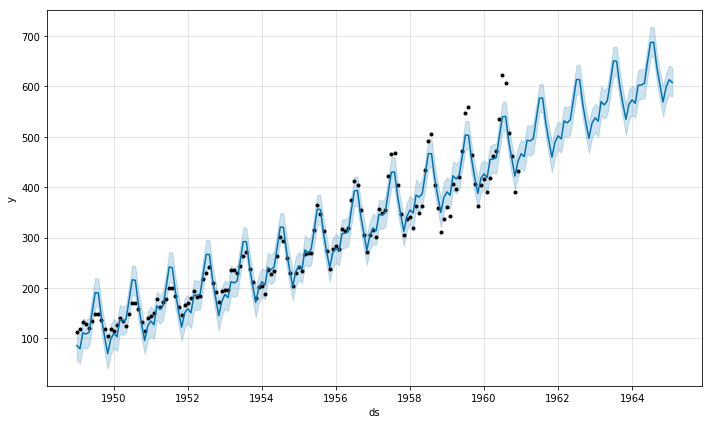

In [2]:
# Showing additive seasonality, meaning the effect of seasonality is added to the trend to get the forecast
df = pd.read_csv('/home/kkumar/Workspace/FB_Prophet_Practice/data/example_air_passengers.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

#### This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

#### Prophet can model multiplicative seasonality by setting seasonality_mode='multiplicative' in the input arguments:

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/kkumar/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


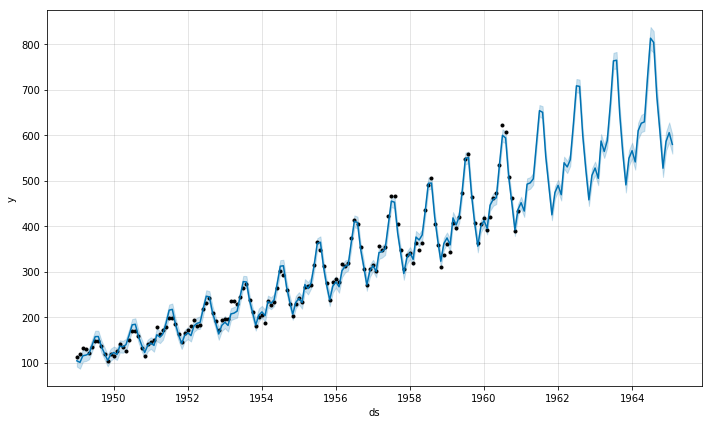

In [3]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
# future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

#### The components figure will now show the seasonality as a percent of the trend:

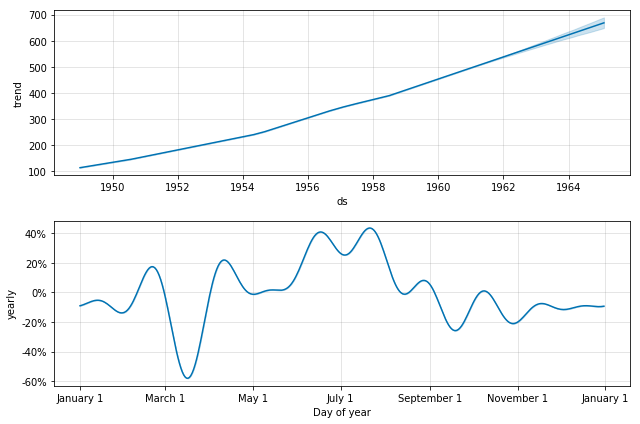

In [4]:
fig = m.plot_components(forecast)

#### With seasonality_mode='multiplicative', holiday effects will also be modeled as multiplicative. Any added seasonalities or extra regressors will by default use whatever seasonality_mode is set to, but can be overriden by specifying mode='additive' or mode='multiplicative' as an argument when adding the seasonality or regressor.

#### For example, this block sets the built-in seasonalities to multiplicative, but includes an additive quarterly seasonality and an additive regressor

In [5]:
m = Prophet(seasonality_mode='multiplicative')
m.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='additive')
m.add_regressor('regressor', mode='additive')
# Predict on forecast having a regressor

#### Additive and multiplicative extra regressors will show up in separate panels on the components plot.